In [1]:
# AutoTarget can be easily installed via pypi.
!pip install autotarget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 MB 8.5 MB/s eta 0:00:00


#1. Quick start


You can search for a disease using search_disease(). If you search for a disease with search(), you can get recommendations for proteins predicted as drug targets among proteins related to the disease.

In [2]:
from autotarget import autotarget

searcher = autotarget.Searcher()

Loaded 984851 data from file.
28877 disease names were extracted.


In [7]:
searcher.search_disease('inflammation')

24 results


{'AUTOINFLAMMATION WITH ARTHRITIS AND DYSKERATOSIS',
 'AUTOINFLAMMATION WITH INFANTILE ENTEROCOLITIS',
 'AUTOINFLAMMATION, ANTIBODY DEFICIENCY, AND IMMUNE DYSREGULATION, PLCG2-ASSOCIATED',
 'Autoimmune inflammation of skeletal muscle',
 'Chronic lymphocytic inflammation with pontine perivascular enhancement responsive to steroids',
 'Connective tissue inflammation',
 'Diffuse inflammation',
 'Ear Inflammation',
 'Experimental Lung Inflammation',
 'Gastrointestinal inflammation',
 'Inflammation',
 'Inflammation of fetal umbilical artery',
 'Inflammation of large intestine',
 'Lower respiratory tract inflammation',
 'Neurogenic Inflammation',
 'Paronychia Inflammation',
 'Periodontal inflammation',
 'Plasma cell inflammation',
 'Prostatic disorders (excl infections and inflammations)',
 'Tumour inflammation',
 'Urinary tract inflammation',
 'Vascular inflammations',
 'heart inflammation',
 'sciatic nerve inflammation'}

In [8]:
searcher.search('inflammation')

,id,probability,label,Entry,Protein names,UniProtKB,geneName,pLI,DSI,DPI,diseaseName
0,ENSP00000336528,0.999995,1.0,O75469,Nuclear receptor subfamily 1 group I member 2 ...,O75469,NR1I2,7.266800e-09,0.418,0.846,Periodontal inflammation
1,ENSP00000336528,0.999995,1.0,O75469,Nuclear receptor subfamily 1 group I member 2 ...,O75469,NR1I2,7.266800e-09,0.418,0.846,Vascular inflammations
2,ENSP00000336528,0.999995,1.0,O75469,Nuclear receptor subfamily 1 group I member 2 ...,O75469,NR1I2,7.266800e-09,0.418,0.846,Gastrointestinal inflammation
3,ENSP00000379683,0.999981,1.0,P11511,Aromatase (EC 1.14.14.14) (CYPXIX) (Cytochrome...,P11511,CYP19A1,1.702200e-05,0.410,0.885,Prostatic disorders (excl infections and infla...
4,ENSP00000459962,0.999969,1.0,Q8NER1,Transient receptor potential cation channel su...,Q8NER1,TRPV1,1.010300e-16,0.446,0.885,Vascular inflammations
...,...,...,...,...,...,...,...,...,...,...,...
292,ENSP00000260010,0.060883,1.0,O60603,Toll-like receptor 2 (Toll/interleukin-1 recep...,O60603,TLR2,1.015200e-06,0.361,0.923,Vascular inflammations
293,ENSP00000260010,0.060883,1.0,O60603,Toll-like receptor 2 (Toll/interleukin-1 recep...,O60603,TLR2,1.015200e-06,0.361,0.923,Periodontal inflammation
294,ENSP00000298527,0.059956,1.0,Q9P126,C-type lectin domain family 1 member B (C-type...,Q9P126,CLEC1B,4.936500e-08,0.650,0.615,Vascular inflammations
295,ENSP00000284440,0.058761,1.0,P09936,Ubiquitin carboxyl-terminal hydrolase isozyme ...,P09936,UCHL1,9.909500e-01,0.482,0.885,Vascular inflammations


# 2. Mode and scope

More detailed search is possible using mode and scope.

< mode >
- partial (default): Display in search results even if the disease name is only partially matched.
- exact: Displays only results with an exact disease name match.

< scope >
- positive (default): Displays only results whose probability exceeds the threshold.
- negative: Displays only results whose probability does not exceed the threshold.
- all: Show all results.


In [14]:
# Unlike the quick start example, only results that are exactly 'Inflammation' are displayed.
searcher.search('Inflammation', mode='exact')

,id,probability,label,Entry,Protein names,UniProtKB,geneName,pLI,DSI,DPI,diseaseName
0,ENSP00000327251,0.999990,1.0,P35228,"Nitric oxide synthase, inducible (EC 1.14.13.3...",P35228,NOS2,4.027700e-15,0.364,0.923,Inflammation
1,ENSP00000394624,0.999985,1.0,P35372,Mu-type opioid receptor (M-OR-1) (MOR-1) (Mu o...,P35372,OPRM1,7.888200e-11,0.457,0.808,Inflammation
2,ENSP00000379683,0.999981,1.0,P11511,Aromatase (EC 1.14.14.14) (CYPXIX) (Cytochrome...,P11511,CYP19A1,1.702200e-05,0.410,0.885,Inflammation
3,ENSP00000217386,0.999974,1.0,P01178,Oxytocin-neurophysin 1 (OT-NPI) [Cleaved into:...,P01178,OXT,7.119700e-01,0.615,0.423,Inflammation
4,ENSP00000478255,0.999969,1.0,P08183,ATP-dependent translocase ABCB1 (ATP-binding c...,P08183,ABCB1,1.256400e-05,0.344,0.885,Inflammation
...,...,...,...,...,...,...,...,...,...,...,...
329,ENSP00000260010,0.060883,1.0,O60603,Toll-like receptor 2 (Toll/interleukin-1 recep...,O60603,TLR2,1.015200e-06,0.361,0.923,Inflammation
330,ENSP00000293825,0.055215,1.0,O43508,Tumor necrosis factor ligand superfamily membe...,O43508,TNFSF12,7.699700e-01,0.556,0.769,Inflammation
331,ENSP00000242839,0.054608,1.0,P35670,Copper-transporting ATPase 2 (EC 7.2.2.8) (Cop...,P35670,ATP7B,4.800100e-30,0.529,0.654,Inflammation
332,ENSP00000341170,0.052813,1.0,P21246,Pleiotrophin (PTN) (Heparin-binding brain mito...,P21246,PTN,7.507300e-03,0.515,0.808,Inflammation


In [15]:
# Only results with low probability are displayed.
searcher.search('Inflammation', mode='exact', scope='negative')

,id,probability,label,Entry,Protein names,UniProtKB,geneName,pLI,DSI,DPI,diseaseName
0,ENSP00000373620,0.048606,0.0,P10809,"60 kDa heat shock protein, mitochondrial (EC 5...",P10809,HSPD1,9.925700e-01,0.432,0.808,Inflammation
1,ENSP00000332812,0.047770,0.0,Q9Y5Y4,Prostaglandin D2 receptor 2 (Chemoattractant r...,Q9Y5Y4,PTGDR2,2.702500e-03,0.612,0.692,Inflammation
2,ENSP00000355330,0.039563,0.0,P21980,Protein-glutamine gamma-glutamyltransferase 2 ...,P21980,TGM2,6.811800e-18,0.445,0.808,Inflammation
3,ENSP00000433560,0.039210,0.0,P02511,Alpha-crystallin B chain (Alpha(B)-crystallin)...,P02511,CRYAB,2.247000e-02,0.515,0.731,Inflammation
4,ENSP00000368632,0.037383,0.0,P23771,Trans-acting T-cell-specific transcription fac...,P23771,GATA3,8.988700e-01,0.415,0.846,Inflammation
...,...,...,...,...,...,...,...,...,...,...,...
99,ENSP00000219782,0.000011,0.0,P56270,Myc-associated zinc finger protein (MAZI) (Pur...,P56270,MAZ,9.436300e-01,0.617,0.654,Inflammation
100,ENSP00000380460,0.000011,0.0,Q9Y263,Phospholipase A-2-activating protein (PLA2P) (...,Q9Y263,PLAA,4.687300e-01,0.597,0.692,Inflammation
101,ENSP00000354080,0.000003,0.0,Q8IWY4,"Signal peptide, CUB and EGF-like domain-contai...",Q8IWY4,SCUBE1,9.607600e-01,0.743,0.500,Inflammation
102,ENSP00000429969,0.000002,0.0,Q9NQ36,"Signal peptide, CUB and EGF-like domain-contai...",Q9NQ36,SCUBE2,3.562900e-21,0.743,0.231,Inflammation


# 3. Threshold
- The default threshold is 0.05, which is based on a recall rate of about 90%.
- You can apply a higher threshold for more stringent evaluation and a lower threshold to see more results.

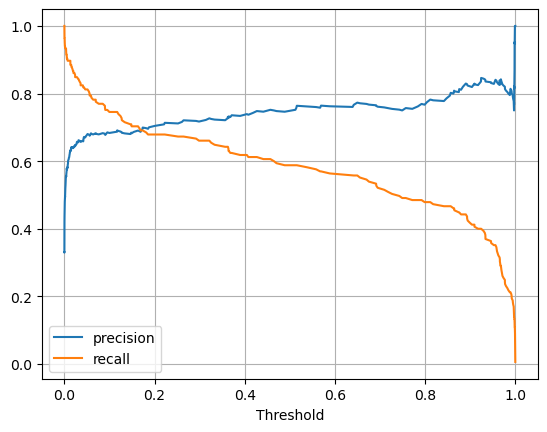

In [16]:
# The default threshold is 0.05
searcher.threshold

0.05

In [20]:
# set threshold as 0.3
searcher.change_threshold(0.3)

In [21]:
# When the threshold is 0.05, 334 results are displayed, but when the threshold is 0.3, only 298 results are displayed.
searcher.search('Inflammation', mode='exact')

,id,probability,label,Entry,Protein names,UniProtKB,geneName,pLI,DSI,DPI,diseaseName
0,ENSP00000327251,0.999990,1.0,P35228,"Nitric oxide synthase, inducible (EC 1.14.13.3...",P35228,NOS2,4.027700e-15,0.364,0.923,Inflammation
1,ENSP00000394624,0.999985,1.0,P35372,Mu-type opioid receptor (M-OR-1) (MOR-1) (Mu o...,P35372,OPRM1,7.888200e-11,0.457,0.808,Inflammation
2,ENSP00000379683,0.999981,1.0,P11511,Aromatase (EC 1.14.14.14) (CYPXIX) (Cytochrome...,P11511,CYP19A1,1.702200e-05,0.410,0.885,Inflammation
3,ENSP00000217386,0.999974,1.0,P01178,Oxytocin-neurophysin 1 (OT-NPI) [Cleaved into:...,P01178,OXT,7.119700e-01,0.615,0.423,Inflammation
4,ENSP00000478255,0.999969,1.0,P08183,ATP-dependent translocase ABCB1 (ATP-binding c...,P08183,ABCB1,1.256400e-05,0.344,0.885,Inflammation
...,...,...,...,...,...,...,...,...,...,...,...
293,ENSP00000212015,0.325269,1.0,Q96EB6,NAD-dependent protein deacetylase sirtuin-1 (h...,Q96EB6,SIRT1,8.732600e-02,0.378,0.885,Inflammation
294,ENSP00000357727,0.322664,1.0,P06702,Protein S100-A9 (Calgranulin-B) (Calprotectin ...,P06702,S100A9,4.777000e-01,0.433,0.885,Inflammation
295,ENSP00000261652,0.320865,1.0,O14836,Tumor necrosis factor receptor superfamily mem...,O14836,TNFRSF13B,2.090800e-15,0.558,0.769,Inflammation
296,ENSP00000387159,0.316639,1.0,P23582,C-type natriuretic peptide [Cleaved into: CNP-...,P23582,NPPC,6.064700e-02,0.568,0.769,Inflammation
